Part 0:

In [28]:
%matplotlib inline
import numpy as np
import theano
import theano.tensor as T
import matplotlib.pyplot as plt
from scipy.stats import poisson
import matplotlib.patches as mpatches
from functools import partial
import pickle
import os
import demixing as dm
from demixing import MLP, HiddenLayer

nneuron = 61
min_angle = -90
max_angle = 90
sprefs = np.linspace(min_angle, max_angle, nneuron)
eps = np.finfo(np.float64).eps
sigtc_sq = float(10**2)

In [29]:
posts = {}
testsets = {}
for s_i in range(91):
    file_name = 'output_post/post_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        posts[c, delta_s] = p
        testsets[c, delta_s] = r
for s_i in range(61):
    file_name = 'output_post_1/post_1_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        if c == [[1], [4]]:
            i = 14
        elif c == [[4], [1]]:
            i = 41
        posts[i, delta_s] = p
        testsets[i, delta_s] = r

In [30]:
post_func = dm.posterior_setup(low=1, high=1, discrete_c=1, num_s=60, r_max=1)
test_data = dm.generate_testset(4500, stim_0=-30, stim_1=-30, discrete_c=1, low=1, high=1, r_max=1)
r, _, _ = test_data
posts[1, 0] = dm.get_posteriors_pool(r, post_func)

4500 trials per contrast level


In [31]:
s1 = -30
num_deltas = 30
c_arr = [1, 2, 4, 14, 41]

post_stats = {'mean_s1': np.zeros((len(c_arr), num_deltas)), 
                'mean_s2': np.zeros((len(c_arr), num_deltas)), 
                'bias_s1': np.zeros((len(c_arr), num_deltas)), 
                'bias_s2': np.zeros((len(c_arr), num_deltas)), 
                'var_s1': np.zeros((len(c_arr), num_deltas)), 
                'var_s2': np.zeros((len(c_arr), num_deltas)), 
                'cov': np.zeros((len(c_arr), num_deltas)), 
                'corr': np.zeros((len(c_arr), num_deltas)),
                'mse': np.zeros((len(c_arr), num_deltas)),
                }
for i in range(len(c_arr)):
    c = c_arr[i]
    for delta_s in range(num_deltas): 
        if (c, delta_s) in posts:
            post_means = np.array((posts[c, delta_s]['mean_s1'], posts[c, delta_s]['mean_s2']))
            stats = dm.get_statistics(s1, s1 + delta_s, post_means)
            post_stats['mean_s1'][i][delta_s] = stats['mean_s1']
            post_stats['mean_s2'][i][delta_s] = stats['mean_s2']
            post_stats['bias_s1'][i][delta_s] = stats['bias_s1']
            post_stats['bias_s2'][i][delta_s] = stats['bias_s2']
            post_stats['var_s1'][i][delta_s] = stats['var_s1']
            post_stats['var_s2'][i][delta_s] = stats['var_s2']
            post_stats['cov'][i][delta_s] = stats['cov']
            post_stats['corr'][i][delta_s] = stats['corr']
            post_stats['mse'][i][delta_s] = stats['mse']
        else:
            print c, delta_s

In [32]:
num_deltas = 30
nn_stats = {'mean_s1': [[], [], [], [], []], 
                'mean_s2': [[], [], [], [], []], 
                'bias_s1': [[], [], [], [], []], 
                'bias_s2': [[], [], [], [], []], 
                'var_s1': [[], [], [], [], []], 
                'var_s2': [[], [], [], [], []], 
                'cov': [[], [], [], [], []], 
                'corr': [[], [], [], [], []],
                'mse': [[], [], [], [], []],
                }

for i in range(600):
    file_name = 'output_nn_runs/nn_runs' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        ind = c - 1
        if c == 4:
            ind = 2
        nn_stats['mean_s1'][ind].append(stats['mean_s1'])
        nn_stats['mean_s2'][ind].append(stats['mean_s2'])
        nn_stats['bias_s1'][ind].append(stats['bias_s1'])
        nn_stats['bias_s2'][ind].append(stats['bias_s2'])
        nn_stats['var_s1'][ind].append(stats['var_s1'])
        nn_stats['var_s2'][ind].append(stats['var_s2'])
        nn_stats['cov'][ind].append(stats['cov'])
        nn_stats['corr'][ind].append(stats['corr'])
        nn_stats['mse'][ind].append(stats['mse'])
for i in range(400):
    file_name = 'output_nn_runs_1/nn_runs_1_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        if c == [[1], [4]]:
            ind = 3
        if c == [[4], [1]]:
            ind = 4
        nn_stats['mean_s1'][ind].append(stats['mean_s1'])
        nn_stats['mean_s2'][ind].append(stats['mean_s2'])
        nn_stats['bias_s1'][ind].append(stats['bias_s1'])
        nn_stats['bias_s2'][ind].append(stats['bias_s2'])
        nn_stats['var_s1'][ind].append(stats['var_s1'])
        nn_stats['var_s2'][ind].append(stats['var_s2'])
        nn_stats['cov'][ind].append(stats['cov'])
        nn_stats['corr'][ind].append(stats['corr'])
        nn_stats['mse'][ind].append(stats['mse'])
for ind in range(len(nn_stats['mean_s1'])):
    nn_stats['mean_s1'][ind] = np.array(nn_stats['mean_s1'][ind])
    nn_stats['mean_s2'][ind] = np.array(nn_stats['mean_s2'][ind])
    nn_stats['bias_s1'][ind] = np.array(nn_stats['bias_s1'][ind])
    nn_stats['bias_s2'][ind] = np.array(nn_stats['bias_s2'][ind])
    nn_stats['var_s1'][ind] = np.array(nn_stats['var_s1'][ind])
    nn_stats['var_s2'][ind] = np.array(nn_stats['var_s2'][ind])
    nn_stats['cov'][ind] = np.array(nn_stats['cov'][ind])
    nn_stats['corr'][ind] = np.array(nn_stats['corr'][ind])
    nn_stats['mse'][ind] = np.array(nn_stats['mse'][ind])

In [33]:
pkl_file = open('stats_part0.pkl', 'wb')
pickle.dump((post_stats, nn_stats), pkl_file)
pkl_file.close()

In [35]:
pkl_file = open('stats_part0.pkl', 'rb')
post_stats, nn_stats = pickle.load(pkl_file)
pkl_file.close()

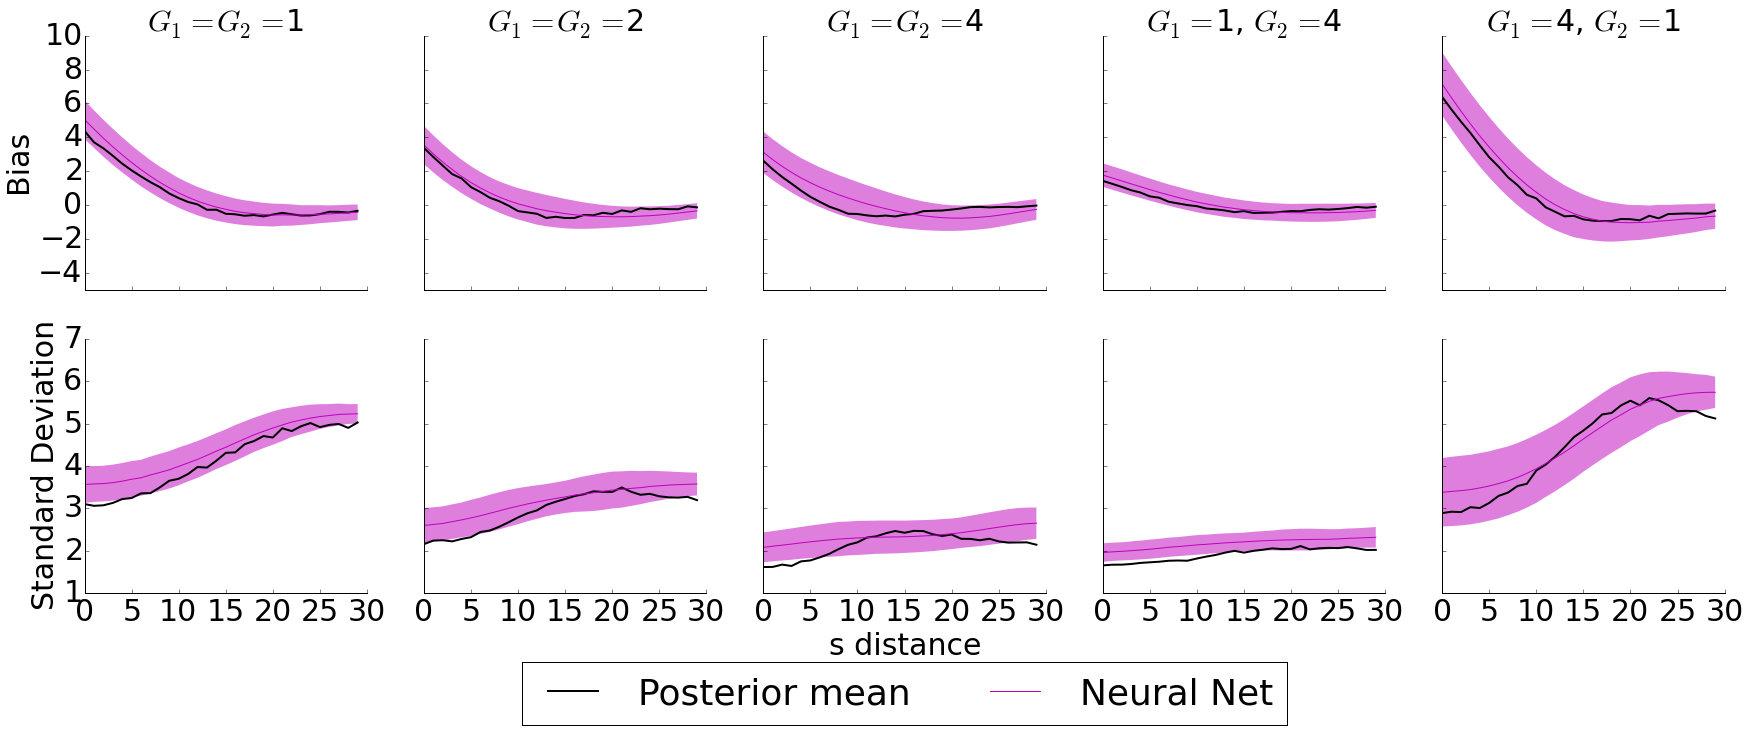

In [48]:
c_arr = [1, 2, 4, [1, 4], [4, 1]]
f, ax = plt.subplots(2, len(c_arr), sharex='col', sharey='row')
plt.rc('font', family='sans serif', size=30)
s = range(0, 30)
for i in range(len(c_arr)):
    neg_sd = np.mean(nn_stats['bias_s2'][i], axis=0) - np.std(nn_stats['bias_s2'][i], axis=0)
    pos_sd = np.mean(nn_stats['bias_s2'][i], axis=0) + np.std(nn_stats['bias_s2'][i], axis=0)
    ax[0, i].plot(post_stats['bias_s2'][i], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(np.mean(nn_stats['bias_s2'][i], axis=0), c='m', label="Neural Net")
    if type(c_arr[i]) is int:
        ax[0, i].set_title(r'$G_1 = G_2 = $' + str(c_arr[i]), fontsize=30) #Change
    if type(c_arr[i]) is list:
        ax[0, i].set_title(r'$G_1 = $' + str(c_arr[i][0]) + ", " + r'$G_2 = $' + str(c_arr[i][1]), fontsize=30)
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].set_ylim(-5, 10)
    ax[0, i].spines["top"].set_visible(False)
    ax[0, i].spines["right"].set_visible(False)
    ax[0, i].yaxis.set_ticks_position('left')
    ax[0, i].xaxis.set_ticks_position('bottom')
ax[0, 0].set_ylabel('Bias', fontsize=30)
for i in range(len(c_arr)):
    nn_sd = np.sqrt(nn_stats['var_s2'][i])
    post_sd = np.sqrt(post_stats['var_s2'][i])
    neg_sd = np.mean(nn_sd, axis=0) - np.std(nn_sd, axis=0)
    pos_sd = np.mean(nn_sd, axis=0) + np.std(nn_sd, axis=0)
    ax[1, i].plot(post_sd, c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(np.mean(nn_sd, axis=0), c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[1, i].spines["top"].set_visible(False)
    ax[1, i].spines["right"].set_visible(False)
    ax[1, i].yaxis.set_ticks_position('left')
    ax[1, i].xaxis.set_ticks_position('bottom')
ax[1, (len(c_arr)/2)].set_xlabel('s distance',fontsize=30)
ax[1, 0].set_ylabel('Standard Deviation' ,fontsize=30)
ax[1, (len(c_arr)/2)].legend(loc=9, bbox_to_anchor=(0.5, -0.2), ncol=2)
f.set_size_inches(25,10)
plt.tight_layout()

In [9]:
pkl_file = open('output_nn_runs/nn_runs212.pkl', 'rb')
nn, _, _, _, _ = pickle.load(pkl_file)

In [11]:
c_arr = [[[4], [4]]]
s_arr = np.linspace(-60, 60, 120)
acts = dm.get_mean_acts(s_arr, nn, c_arr[0])  

50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per 

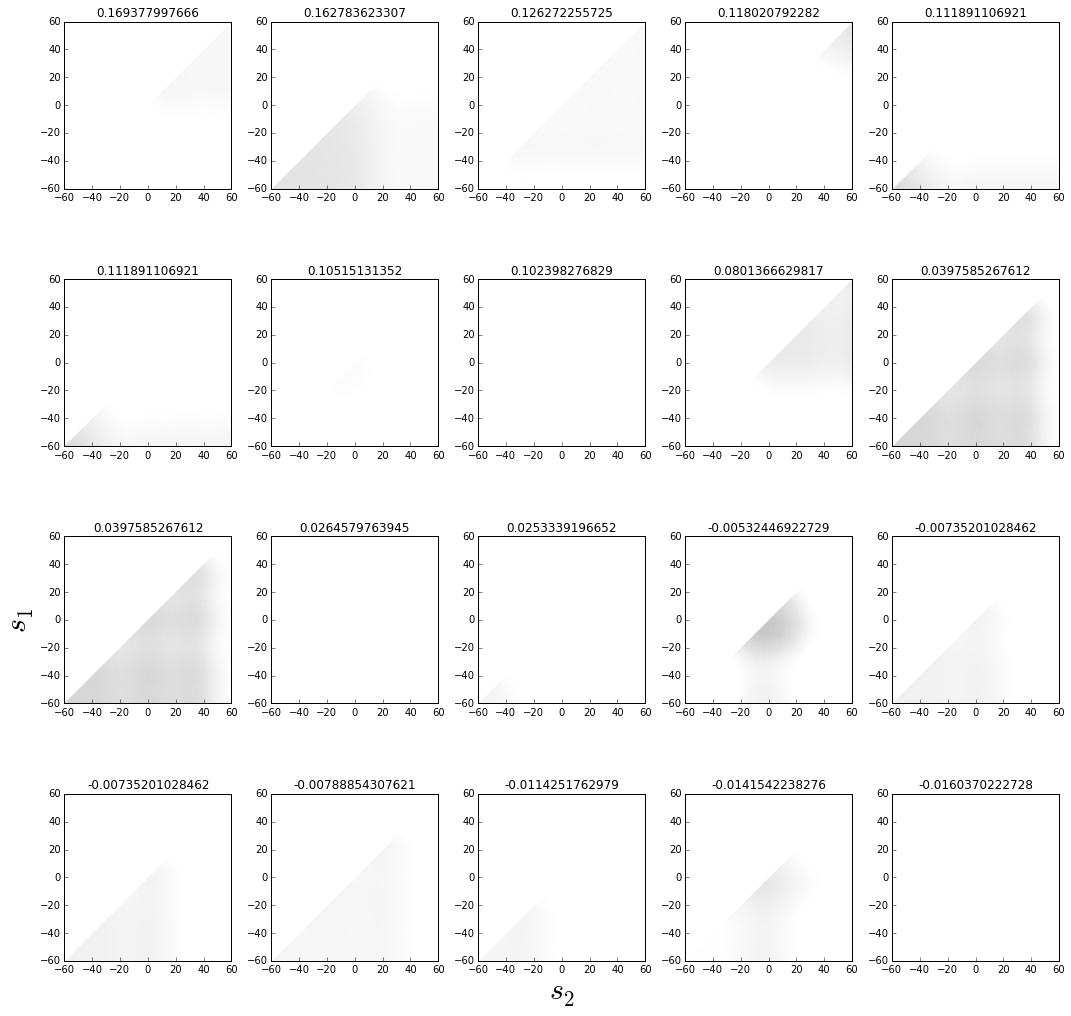

In [12]:
sort_arr = np.argsort(nn.get_params()['W', 2][:, 0], axis=0)[::-1]
f, axarr = plt.subplots(4, 5)
for i in range(4):
    for j in range(5):
        ind = i * 5 + j
        sort_ind = sort_arr[ind]
        axarr[i,j].imshow(acts[:, :, sort_ind],  origin='lower', cmap='Greys', extent=(-60, 60, -60, 60), vmax=np.max(acts))
        axarr[i,j].yaxis.set_ticks_position('left')
        axarr[i,j].xaxis.set_ticks_position('bottom')
        axarr[i,j].set_title(nn.get_params()['W', 2][sort_ind][0])
axarr[2,0].set_ylabel("$s_1$", fontsize = 30)
axarr[3,2].set_xlabel("$s_2$", fontsize = 30)
f.set_size_inches(15,15)
plt.tight_layout()

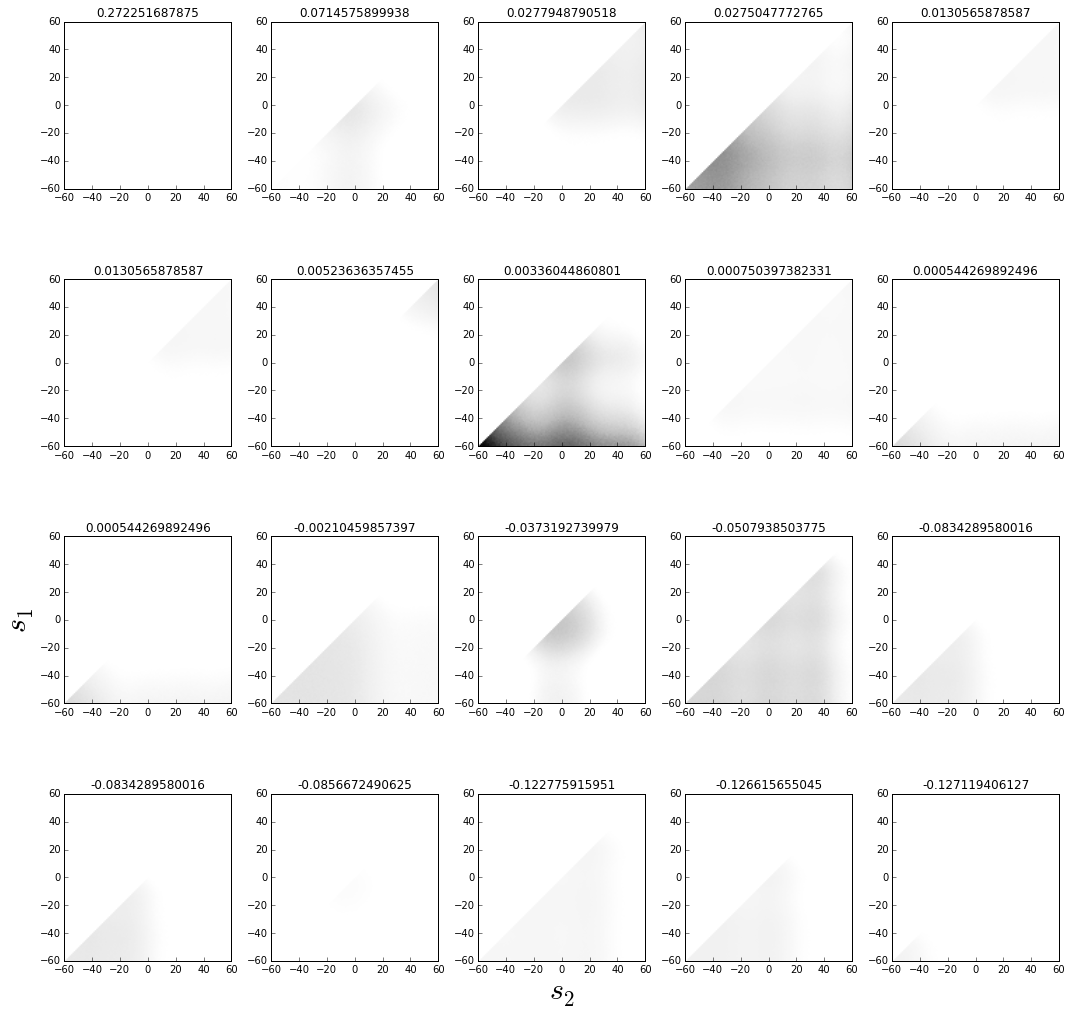

In [13]:
sort_arr = np.argsort(nn.get_params()['W', 2][:, 1], axis=0)[::-1]
f, axarr = plt.subplots(4, 5)
for i in range(4):
    for j in range(5):
        ind = i * 5 + j
        sort_ind = sort_arr[ind]
        axarr[i,j].imshow(acts[:, :, sort_ind],  origin='lower', cmap='Greys', extent=(-60, 60, -60, 60), vmax=np.max(acts))
        axarr[i,j].yaxis.set_ticks_position('left')
        axarr[i,j].xaxis.set_ticks_position('bottom')
        axarr[i,j].set_title(nn.get_params()['W', 2][sort_ind][1])
axarr[2,0].set_ylabel("$s_1$", fontsize = 30)
axarr[3,2].set_xlabel("$s_2$", fontsize = 30)
f.set_size_inches(15,15)
plt.tight_layout()

Part 1:

In [51]:
posts = {}
testsets = {}
for s_i in range(31):
    file_name = 'output_post_2/post_2_' + str(s_i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        p, r, c, delta_s = pickle.load(pkl_file)
        posts[delta_s] = p
        testsets[delta_s] = r

In [52]:
s1 = -30
num_deltas = 30
c_arr = [[1, 2, 4], [1, 2, 4]]
perm_cs = dm.cartesian(c_arr)
ndata_per_c = len(posts[0]['mean_s1'])/len(perm_cs)

post_stats = {'mean_s1': np.zeros((num_deltas, len(perm_cs))), 
                'mean_s2': np.zeros((num_deltas, len(perm_cs))),  
                'bias_s1': np.zeros((num_deltas, len(perm_cs))),  
                'bias_s2': np.zeros((num_deltas, len(perm_cs))),  
                'var_s1': np.zeros((num_deltas, len(perm_cs))),   
                'var_s2': np.zeros((num_deltas, len(perm_cs))),  
                'cov': np.zeros((num_deltas, len(perm_cs))),   
                'corr': np.zeros((num_deltas, len(perm_cs))),  
                'mse': np.zeros((num_deltas, len(perm_cs))),  
                }

for delta_s in range(num_deltas): 
    if delta_s in posts:
        post_means = np.array((posts[delta_s]['mean_s1'], posts[delta_s]['mean_s2']))
        for c in range(len(perm_cs)):
            post_means_c = post_means[:, (c*ndata_per_c):((c+1)*ndata_per_c)]
            stats = dm.get_statistics(s1, s1 + delta_s, post_means_c)
            post_stats['mean_s1'][delta_s][c] = stats['mean_s1']
            post_stats['mean_s2'][delta_s][c] = stats['mean_s2']
            post_stats['bias_s1'][delta_s][c] = stats['bias_s1']
            post_stats['bias_s2'][delta_s][c] = stats['bias_s2']
            post_stats['var_s1'][delta_s][c] = stats['var_s1']
            post_stats['var_s2'][delta_s][c] = stats['var_s2']
            post_stats['cov'][delta_s][c] = stats['cov']
            post_stats['corr'][delta_s][c] = stats['corr']
            post_stats['mse'][delta_s][c] = stats['mse']
    else:
        print delta_s

In [66]:
num_deltas = 30
nn_stats = {'mean_s1': [[], []], 
                'mean_s2': [[], []], 
                'bias_s1': [[], []], 
                'bias_s2': [[], []], 
                'var_s1': [[], []], 
                'var_s2': [[], []], 
                'cov': [[], []], 
                'corr': [[], []],
                'mse': [[], []],
                }

for i in range(400):
    file_name = 'output_nn_tests_2/nn_tests_2_' + str(i) + '.pkl'
    #file_name = 'output_nn_runs_2/nn_runs_2_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nn_stats['mean_s1'][0].append(stats['mean_s1'])
        nn_stats['mean_s2'][0].append(stats['mean_s2'])
        nn_stats['bias_s1'][0].append(stats['bias_s1'])
        nn_stats['bias_s2'][0].append(stats['bias_s2'])
        nn_stats['var_s1'][0].append(stats['var_s1'])
        nn_stats['var_s2'][0].append(stats['var_s2'])
        nn_stats['cov'][0].append(stats['cov'])
        nn_stats['corr'][0].append(stats['corr'])
        nn_stats['mse'][0].append(stats['mse'])
for i in range(400):
    file_name = 'output_nn_tests_3/nn_tests_3_' + str(i) + '.pkl'
    #file_name = 'output_nn_runs_3/nn_runs_3_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        nn, nnx, valid_mse, stats, c = pickle.load(pkl_file)
        nn_stats['mean_s1'][1].append(stats['mean_s1'])
        nn_stats['mean_s2'][1].append(stats['mean_s2'])
        nn_stats['bias_s1'][1].append(stats['bias_s1'])
        nn_stats['bias_s2'][1].append(stats['bias_s2'])
        nn_stats['var_s1'][1].append(stats['var_s1'])
        nn_stats['var_s2'][1].append(stats['var_s2'])
        nn_stats['cov'][1].append(stats['cov'])
        nn_stats['corr'][1].append(stats['corr'])
        nn_stats['mse'][1].append(stats['mse'])
for ind in range(len(nn_stats['mean_s1'])):
    nn_stats['mean_s1'][ind] = np.array(nn_stats['mean_s1'][ind])
    nn_stats['mean_s2'][ind] = np.array(nn_stats['mean_s2'][ind])
    nn_stats['bias_s1'][ind] = np.array(nn_stats['bias_s1'][ind])
    nn_stats['bias_s2'][ind] = np.array(nn_stats['bias_s2'][ind])
    nn_stats['var_s1'][ind] = np.array(nn_stats['var_s1'][ind])
    nn_stats['var_s2'][ind] = np.array(nn_stats['var_s2'][ind])
    nn_stats['cov'][ind] = np.array(nn_stats['cov'][ind])
    nn_stats['corr'][ind] = np.array(nn_stats['corr'][ind])
    nn_stats['mse'][ind] = np.array(nn_stats['mse'][ind])

In [67]:
pkl_file = open('stats_part1.pkl', 'wb')
pickle.dump((post_stats, nn_stats), pkl_file)
pkl_file.close()

In [68]:
pkl_file = open('stats_part1.pkl', 'rb')
post_stats, nn_stats = pickle.load(pkl_file)
pkl_file.close()

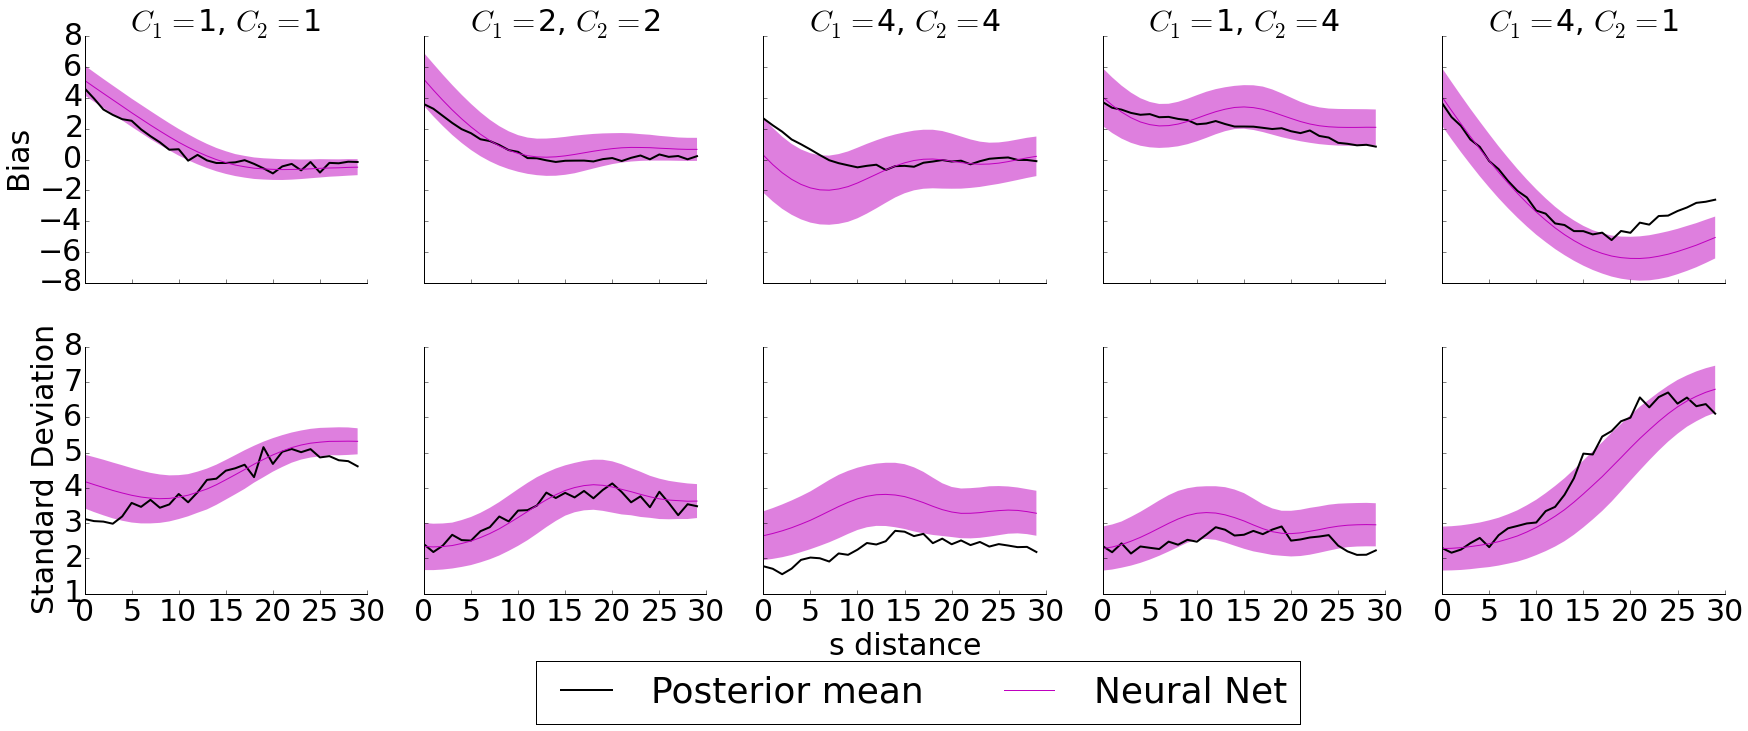

In [77]:
c_arr_inds = [0, 4, 8, 2, 6]
train_arr = ["all", "generalize"]
plt.rc('font', family='sans serif', size=30)
ind = 0
f, ax = plt.subplots(2, len(c_arr_inds), sharex='col', sharey='row')
s = range(0, 30)
for i in range(len(c_arr_inds)):
    nn_mean = np.mean(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[0, i].plot(post_stats['bias_s2'][:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(nn_mean, c='m', label="Neural Net")
    ax[0, i].set_title(r'$C_1 = $' + str(perm_cs[c_arr_inds[i]][0]) + ", " + r'$C_2 = $' + str(perm_cs[c_arr_inds[i]][1]), fontsize=30)
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].spines["top"].set_visible(False)
    ax[0, i].spines["right"].set_visible(False)
    ax[0, i].yaxis.set_ticks_position('left')
    ax[0, i].xaxis.set_ticks_position('bottom')
ax[0, 0].set_ylabel('Bias' ,fontsize=30)

for i in range(len(c_arr_inds)):
    nn_sds = np.sqrt(nn_stats['var_s2'][ind])
    post_sds = np.sqrt(post_stats['var_s2'])
    nn_mean = np.mean(nn_sds, axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_sds, axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[1, i].plot(post_sds[:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(nn_mean , c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[1, i].spines["top"].set_visible(False)
    ax[1, i].spines["right"].set_visible(False)
    ax[1, i].yaxis.set_ticks_position('left')
    ax[1, i].xaxis.set_ticks_position('bottom')
ax[1, (len(c_arr_inds)/2)].set_xlabel(r's distance',fontsize=30)
ax[1, 0].set_ylabel('Standard Deviation' ,fontsize=30)
ax[1, (len(c_arr)/2)].legend(loc=9, bbox_to_anchor=(1.75, -0.2), ncol=2)
f.set_size_inches(25,10)
plt.tight_layout()

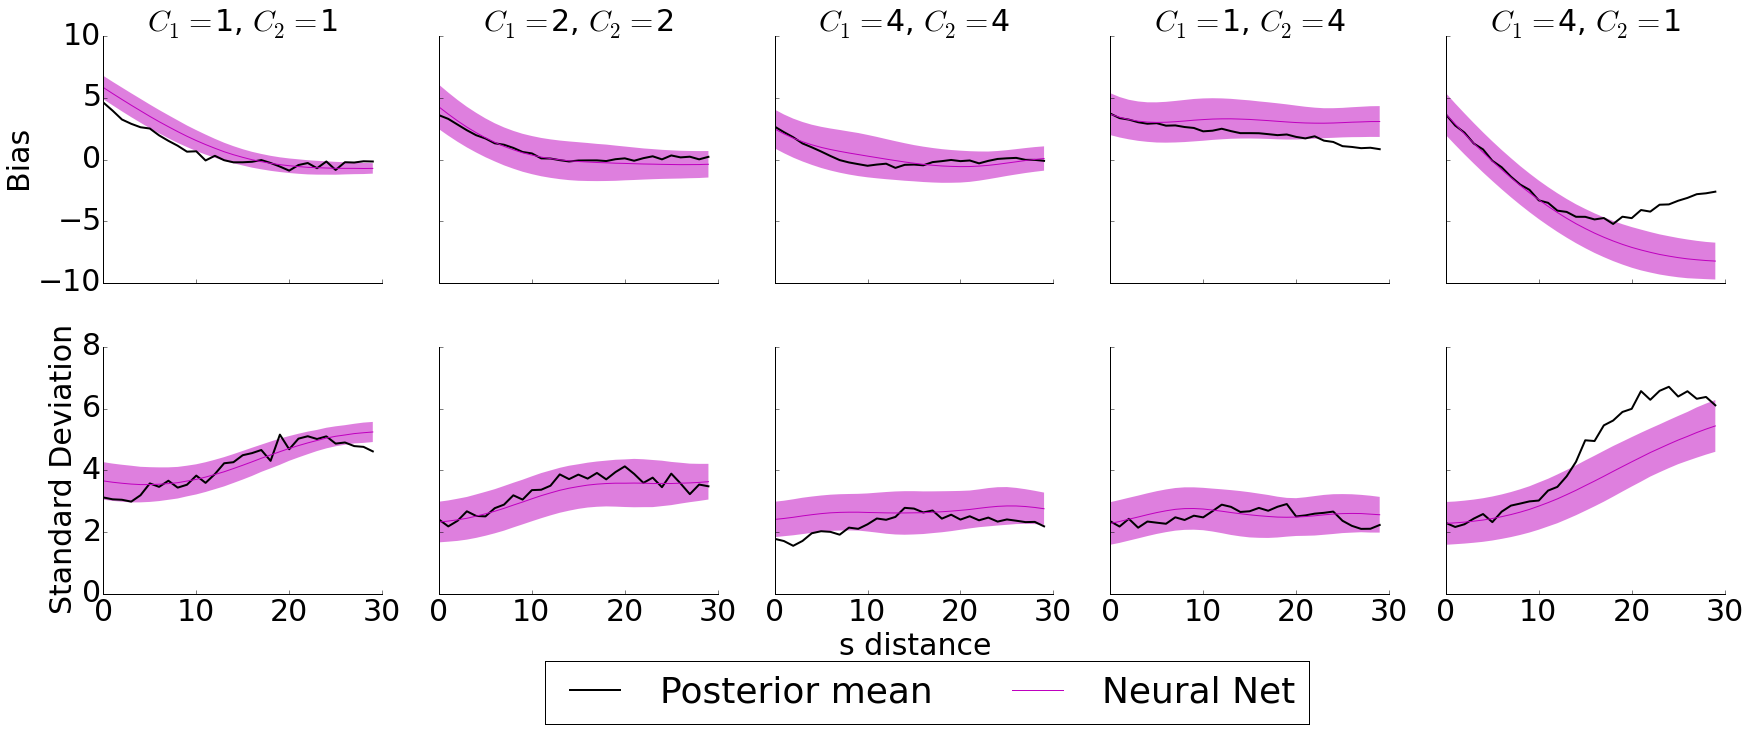

In [80]:
c_arr_inds = [0, 4, 8, 2, 6]
train_arr = ["all", "generalize"]
ind = 1
f, ax = plt.subplots(2, len(c_arr_inds), sharex='col', sharey='row')
s = range(0, 30)
for i in range(len(c_arr_inds)):
    nn_mean = np.mean(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_stats['bias_s2'][ind], axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[0, i].plot(post_stats['bias_s2'][:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[0, i].plot(nn_mean, c='m', label="Neural Net")
    ax[0, i].set_title(r'$C_1 = $' + str(perm_cs[c_arr_inds[i]][0]) + ", " + r'$C_2 = $' + str(perm_cs[c_arr_inds[i]][1]), fontsize=30)
    ax[0, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[0, i].spines["top"].set_visible(False)
    ax[0, i].spines["right"].set_visible(False)
    ax[0, i].yaxis.set_ticks_position('left')
    ax[0, i].xaxis.set_ticks_position('bottom')
    ax[0, i].locator_params(nbins=5)
ax[0, 0].set_ylabel('Bias' ,fontsize=30)

for i in range(len(c_arr_inds)):
    nn_sds = np.sqrt(nn_stats['var_s2'][ind])
    post_sds = np.sqrt(post_stats['var_s2'])
    nn_mean = np.mean(nn_sds, axis=0)[:, c_arr_inds[i]]
    nn_std = np.std(nn_sds, axis=0)[:, c_arr_inds[i]]
    neg_sd = nn_mean - nn_std
    pos_sd = nn_mean + nn_std
    ax[1, i].plot(post_sds[:, c_arr_inds[i]], c='k', linewidth=2, label="Posterior mean")
    ax[1, i].plot(nn_mean , c='m', label="Neural Net")
    #ax[1, i].set_title("Contrast = " + str(c_arr[i]))
    ax[1, i].fill_between(s, pos_sd, neg_sd, facecolor='m', alpha=.5, edgecolor="None", label="Posterior")
    ax[1, i].spines["top"].set_visible(False)
    ax[1, i].spines["right"].set_visible(False)
    ax[1, i].yaxis.set_ticks_position('left')
    ax[1, i].xaxis.set_ticks_position('bottom')
    ax[1, i].locator_params(nbins=5)
ax[1, (len(c_arr_inds)/2)].set_xlabel(r's distance',fontsize=30)
ax[1, 0].set_ylabel('Standard Deviation' ,fontsize=30)
ax[1, (len(c_arr)/2)].legend(loc=9, bbox_to_anchor=(1.75, -0.2), ncol=2)
f.set_size_inches(25,10)
plt.tight_layout()

In [2]:
pkl_file = open('output_readout/readout_1.pkl', 'rb')
lin_preds, lin_corr, full_preds, full_corr, sum_preds, sum_corr, valid_mse_lin, valid_mse_full = pickle.load(pkl_file)
print lin_corr[0, 1]

0.821232792582


In [3]:
lin_corrs = np.zeros(400)
full_corrs = np.zeros(400)
sum_corrs = np.zeros(400)

for i in range(1, 400):
    file_name = 'output_readout/readout_' + str(i) + '.pkl'
    if os.path.isfile(file_name):
        pkl_file = open(file_name, 'rb')
        ro = pickle.load(pkl_file)
        lin_preds, lin_corr, full_preds, full_corr, sum_preds, sum_corr, valid_mse_lin, valid_mse_full = ro
        lin_corrs[i-1] = lin_corr[0, 1]
        full_corrs[i-1] = full_corr[0, 1]
        sum_corrs[i-1] = sum_corr[0, 1]

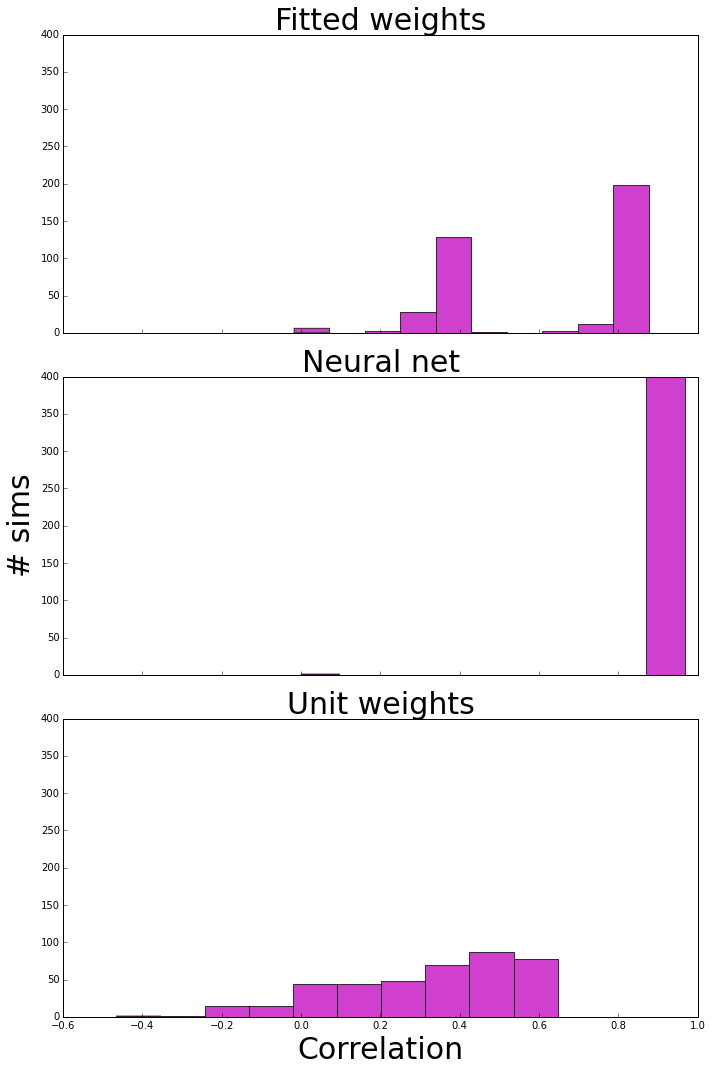

In [20]:
f, ax = plt.subplots(3, sharex=True, sharey=True)
ax[0].hist(lin_corrs[~np.isnan(lin_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].hist(full_corrs[~np.isnan(full_corrs)], 10, facecolor='m', alpha=0.75)
ax[2].hist(sum_corrs[~np.isnan(sum_corrs)], 10, facecolor='m', alpha=0.75)
ax[1].set_ylabel('# sims', fontsize=30)
ax[2].set_xlabel('Correlation', fontsize=30)
ax[0].yaxis.set_ticks_position('left')
ax[0].xaxis.set_ticks_position('bottom')
ax[0].set_title('Fitted weights', fontsize=30)
ax[1].yaxis.set_ticks_position('left')
ax[1].xaxis.set_ticks_position('bottom')
ax[1].set_title('Neural net', fontsize=30)
ax[2].yaxis.set_ticks_position('left')
ax[2].xaxis.set_ticks_position('bottom')
ax[2].set_title('Unit weights', fontsize=30)
f.set_size_inches(10,15)
plt.tight_layout()

In [81]:
pkl_file = open('output_readout_3/readout_3_26.pkl', 'rb')
lin_preds, lin_corr, full_preds, full_corr, sum_preds, sum_corr, valid_mse_lin, valid_mse_full = pickle.load(pkl_file)
print lin_corr[0, 1]

0.800446932821


In [4]:
c_arr = [[[1, 2, 4], [1, 2, 4]]]
s_arr = np.linspace(-60, 60, 120)
acts = dm.get_mean_acts(s_arr, nn, c_arr[0])  

50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per contrast level
50 trials per 

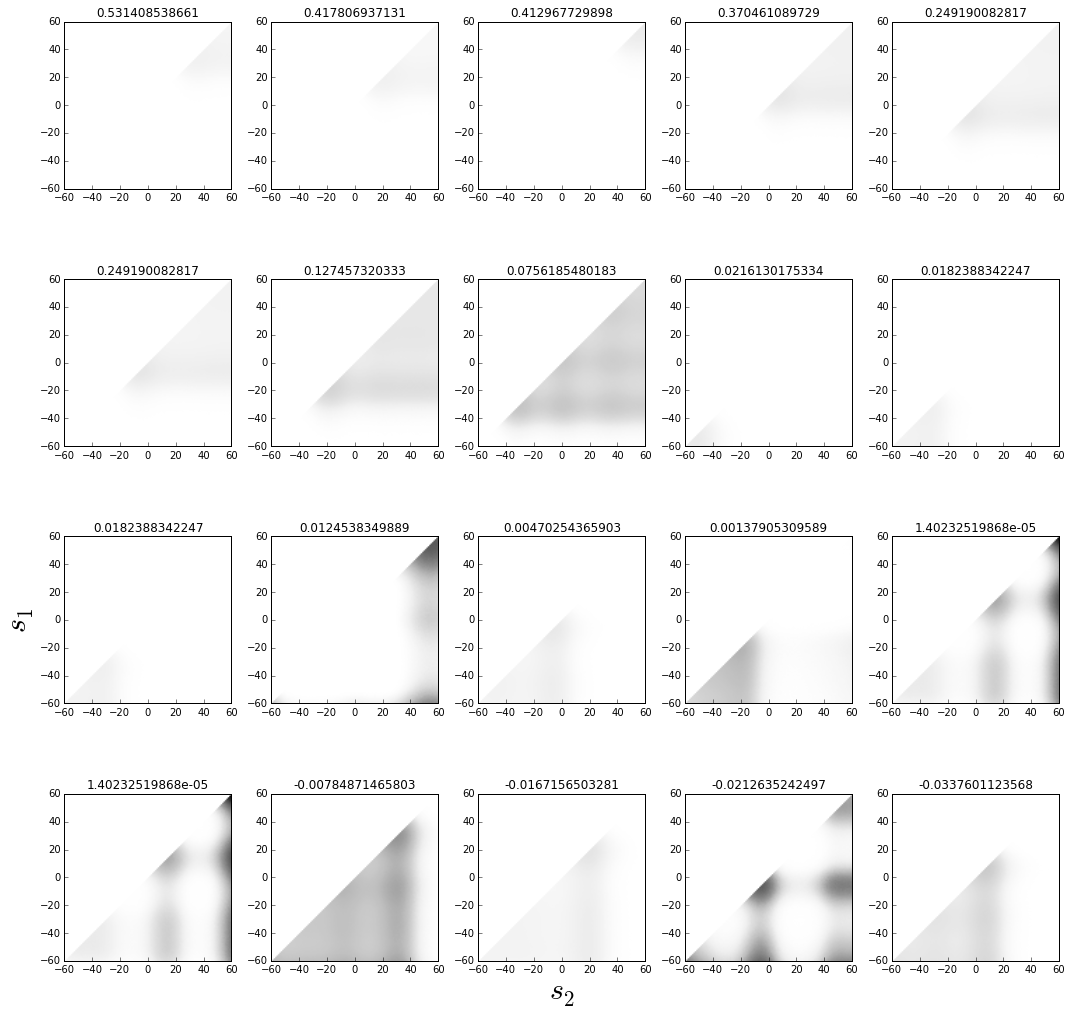

In [7]:
sort_arr = np.argsort(nn.get_params()['W', 2][:, 0], axis=0)[::-1]
f, axarr = plt.subplots(4, 5)
for i in range(4):
    for j in range(5):
        ind = i * 4 + j
        sort_ind = sort_arr[ind]
        axarr[i,j].imshow(acts[:, :, sort_ind],  origin='lower', cmap='Greys', extent=(-60, 60, -60, 60), vmax=np.max(acts))
        axarr[i,j].yaxis.set_ticks_position('left')
        axarr[i,j].xaxis.set_ticks_position('bottom')
        axarr[i,j].set_title(nn.get_params()['W', 2][sort_ind][0])
axarr[2,0].set_ylabel("$s_1$", fontsize = 30)
axarr[3,2].set_xlabel("$s_2$", fontsize = 30)
f.set_size_inches(15,15)
plt.tight_layout()

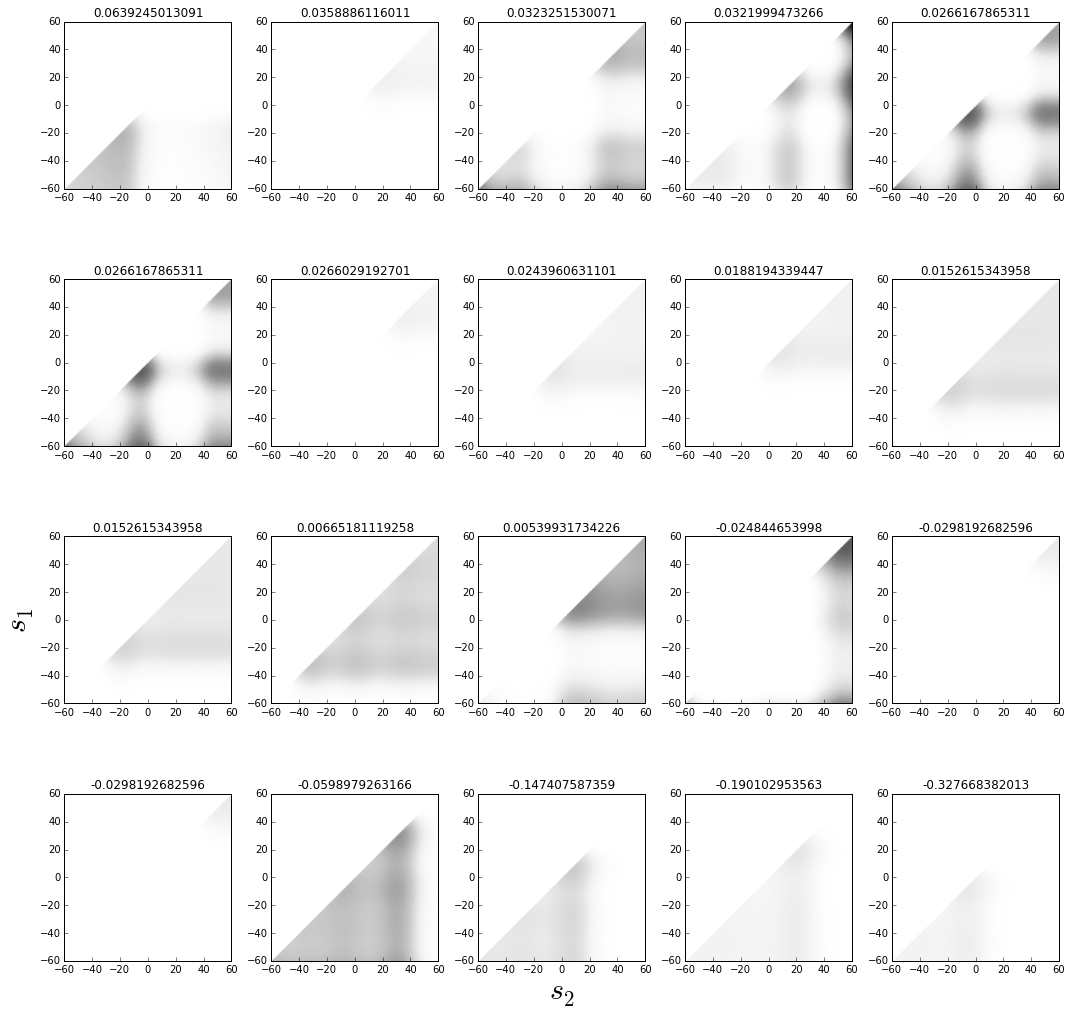

In [8]:
sort_arr = np.argsort(nn.get_params()['W', 2][:, 1], axis=0)[::-1]
f, axarr = plt.subplots(4, 5)
for i in range(4):
    for j in range(5):
        ind = i * 4 + j
        sort_ind = sort_arr[ind]
        axarr[i,j].imshow(acts[:, :, sort_ind],  origin='lower', cmap='Greys', extent=(-60, 60, -60, 60), vmax=np.max(acts))
        axarr[i,j].yaxis.set_ticks_position('left')
        axarr[i,j].xaxis.set_ticks_position('bottom')
        axarr[i,j].set_title(nn.get_params()['W', 2][sort_ind][1])
axarr[2,0].set_ylabel("$s_1$", fontsize = 30)
axarr[3,2].set_xlabel("$s_2$", fontsize = 30)
f.set_size_inches(15,15)
plt.tight_layout()

Just for presentation:

In [19]:
r20, s, c = dm.generate_testset(1, stim_0=-30, stim_1=10, con_0=4, con_1=0, r_max=1)
rm20, s, c = dm.generate_testset(1, stim_0=-30, stim_1=10, con_0=0, con_1=4, r_max=1)

(-0.3, 11)

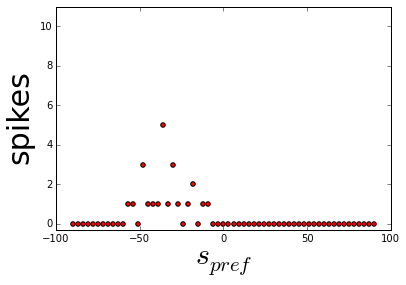

In [20]:
plt.scatter(np.linspace(min_angle, max_angle, nneuron), r20[0], c='r')
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])

(-0.3, 11)

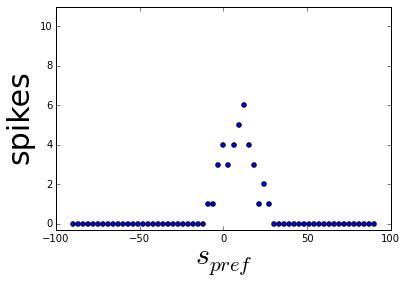

In [21]:
plt.scatter(np.linspace(min_angle, max_angle, nneuron), rm20[0])
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])

"\nplt.arrow(-20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')\nplt.arrow(20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')\nplt.arrow(-19.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')\nplt.arrow(22.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')\nplt.arrow(-21, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')\nplt.arrow(23.5, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')\n"

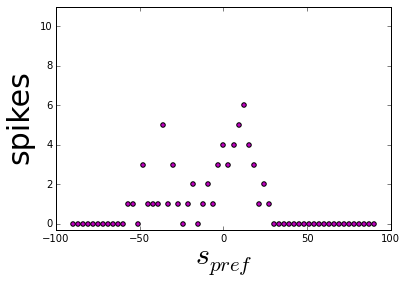

In [22]:
#plt.figure(figsize=(10,10))
plt.scatter(np.linspace(min_angle, max_angle, nneuron), rm20[0] + r20[0], c='m')
plt.ylabel("spikes", fontsize=30)
plt.xlabel("$s_{pref}$", fontsize=30)
plt.ylim([-.3, 11])
"""
plt.arrow(-20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')
plt.arrow(20, 5, 0, -4.85, head_width=5, head_length=.5, fc='orange', ec='orange')
plt.arrow(-19.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')
plt.arrow(22.7, 5, 0, -4.85, head_width=5, head_length=.5, fc='m', ec='m')
plt.arrow(-21, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')
plt.arrow(23.5, 5, 0, -4.85, head_width=5, head_length=.5, fc='k', ec='k')
"""

Posterior plot:

In [23]:
post_func = dm.posterior_setup(discrete_c = [[4], [4]], num_s=121, r_max=1)

In [24]:
mean1, mean2, var1, var2, (s1_grid, s2_grid, grid) = post_func(rm20[0] + r20[0], ret_grid=True)

In [25]:
post_grid = np.zeros((121, 121))
for i in range(len(s1_grid)):
    post_grid[int(s1_grid[i])+60, int(s2_grid[i])+60] = grid[i]

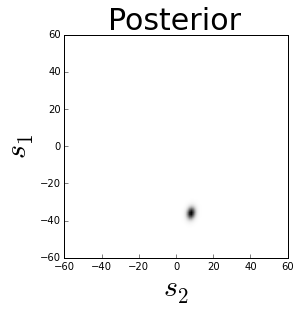

In [26]:
ax = plt.axes()
plt.imshow(post_grid, origin='lower', cmap='Greys', extent=(-60, 60, -60, 60))
plt.ylabel("$s_1$", fontsize=30)
plt.xlabel("$s_2$", fontsize=30)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')
plt.title("Posterior", fontsize=30)